In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("carprices.csv")
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [3]:
df.shape

(13, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [5]:
df.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


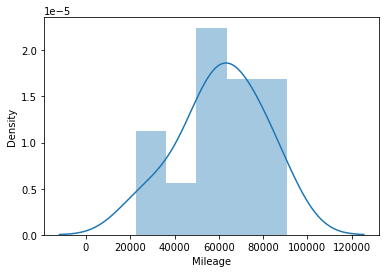

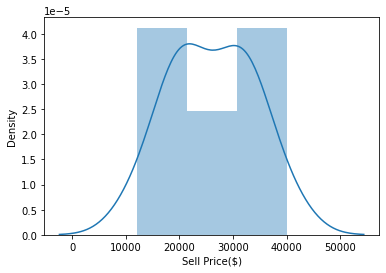

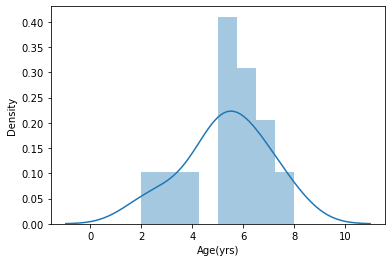

In [6]:
col_num = ["Mileage","Sell Price($)","Age(yrs)"]

for col in col_num:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

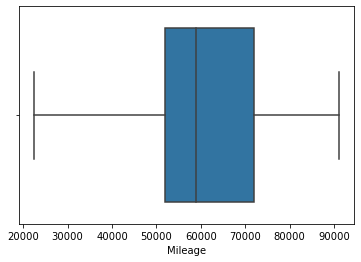

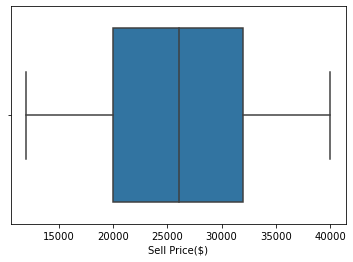

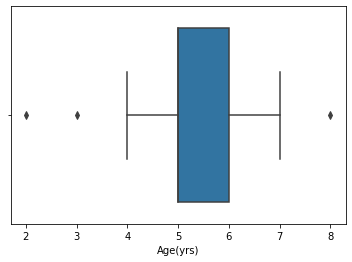

In [7]:
for col in col_num:
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.show()

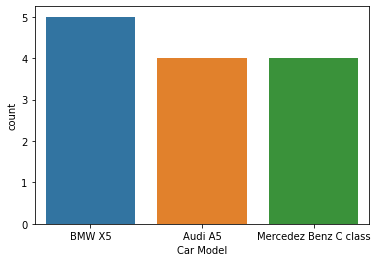

In [8]:
plt.figure()
sns.countplot(data=df, x="Car Model")
plt.show()

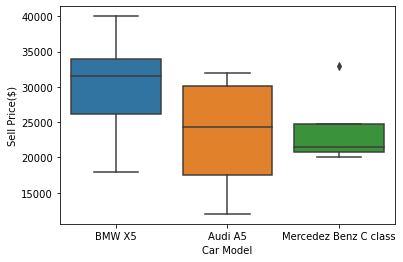

In [9]:
plt.figure()
sns.boxplot(data=df, x="Car Model", y="Sell Price($)")
plt.show()

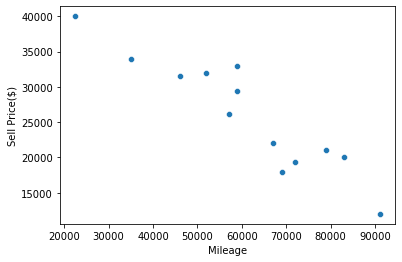

In [10]:
plt.figure()
sns.scatterplot(data=df, x="Mileage", y="Sell Price($)")
plt.show()

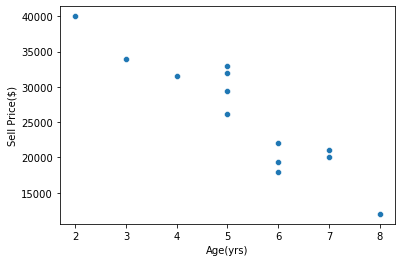

In [11]:
plt.figure()
sns.scatterplot(data=df, x="Age(yrs)", y="Sell Price($)")
plt.show()

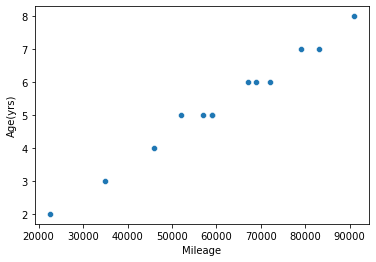

In [12]:
plt.figure()
sns.scatterplot(data=df, x="Mileage", y="Age(yrs)")
plt.show()

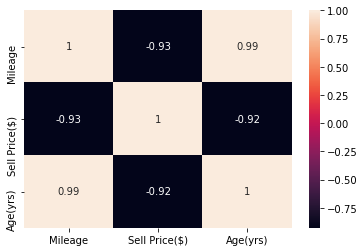

In [13]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
# one-hot encoding

car_model_col = pd.get_dummies(df["Car Model"])
car_model_col.head()

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [15]:
df_new = pd.concat([df,car_model_col],axis=1)
df_new.drop("Car Model", axis=1, inplace=True)
df_new.head()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0


In [16]:
X = df_new.drop("Sell Price($)", axis=1)
y = df_new["Sell Price($)"]

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
model=DecisionTreeRegressor()

In [19]:
cv=cross_val_score(model,X,y,cv=4,scoring="neg_mean_squared_error")

In [20]:
print(cv)

[-26347500.          -6736666.66666667 -12896666.66666667
 -28653333.33333333]


In [23]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
y_pred=model.predict(X_test)

In [32]:
mse=mean_squared_error(y_test,y_pred)
mse

22715000.0

In [33]:
rmse=np.sqrt(mse)
rmse

4766.02559791699